Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_______________________________________________________

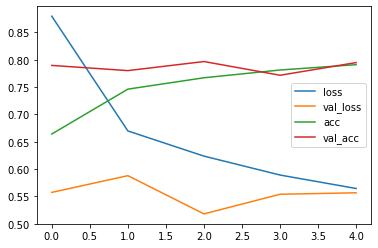

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

train_image = train_image/255.0

test_image = test_image/255.0 # 归一化

# 函数式API使用方法
input = keras.Input(shape=(28 , 28))

x = keras.layers.Flatten()(input)

x = keras.layers.Dense(32 , activation='relu')(x)

x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(64 , activation='relu')(x)

output = keras.layers.Dense(10 , activation='softmax')(x)

model = keras.Model(inputs=input,outputs=output)

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )
history = model.fit(train_image,train_label,epochs=5,validation_data=(test_image,test_label))

plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.legend()


In [12]:
# 正常的添加layer层的一般方法

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28一维向量
model1.add(tf.keras.layers.Dense(32,activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(64,activation='relu'))
model1.add(tf.keras.layers.Dense(64,activation='relu'))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )

history1 = model1.fit(train_image,train_label,epochs=5,validation_data=(test_image,test_label))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2637 - acc: 0.4983 - val_loss: 1.0472 - val_acc: 0.5873
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1306 - acc: 0.5534 - val_loss: 1.2279 - val_acc: 0.5307
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1052 - acc: 0.5681 - val_loss: 1.2320 - val_acc: 0.5048
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1532 - acc: 0.5555 - val_loss: 1.1141 - val_acc: 0.5447
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1634 - acc: 0.5547 - val_loss: 1.2733 - val_acc: 0.5278


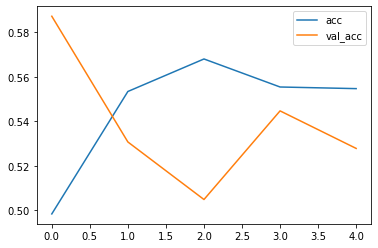

In [14]:
plt.plot(history1.epoch, history1.history.get('acc'), label='acc')
plt.plot(history1.epoch, history1.history.get('val_acc'),label='val_acc')
plt.legend()

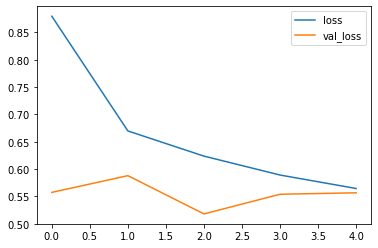

In [15]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.legend()